In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
#from sklearn import metrics

In [2]:
A=pd.DataFrame({'exp':[2.5,3.0,5.7,4.8,7.0,12,8],'g':[1,0,1,0,0,1,0],'sal':[6500,8000,4000,12000,10000,15000,6000]})

In [3]:
A  # g is categorical

,exp,g,sal
0,2.5,1,6500
1,3.0,0,8000
2,5.7,1,4000
3,4.8,0,12000
4,7.0,0,10000
5,12.0,1,15000
6,8.0,0,6000


In [4]:
###ols###

In [5]:
model=smf.ols('sal~exp+g',A).fit()

In [6]:
model.params

Intercept    5149.687197
exp           675.493474
g           -1198.009923
dtype: float64

In [7]:
model.summary()

C:\Users\Ashok\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sal   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.9822
Date:                Sat, 27 Apr 2019   Prob (F-statistic):              0.450
Time:                        13:24:50   Log-Likelihood:                -65.706
No. Observations:                   7   AIC:                             137.4
Df Residuals:                       4   BIC:                             137.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5149.6872   3362.299      1.532      0.200   -4185.550    1.45e+04
exp          675.4935    485.601      1.391      0.237    -672.752    2023.738
g          -1198.0099   2958.649     -0.405      0.706   -9412.537    7016.517
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.618
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.642
Skew:                          -0.450   Prob(JB):                        0.726
Kurtosis:                       1.821   Cond. No.                         17.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
m1=LinearRegression()
m1.fit(x,y)
y1_predict=m1.predict(x)
y1_predict

NameError: name 'x' is not defined

In [9]:
#changing all 0-1 and 1-0 in g

In [26]:
B=pd.DataFrame({'exp':[2.5,3.0,5.7,4.8,7.0,12,8],'g':[0,1,0,1,1,0,1],'sal':[6500,8000,4000,12000,10000,15000,6000]})
B

,exp,g,sal
0,2.5,0,6500
1,3.0,1,8000
2,5.7,0,4000
3,4.8,1,12000
4,7.0,1,10000
5,12.0,0,15000
6,8.0,1,6000


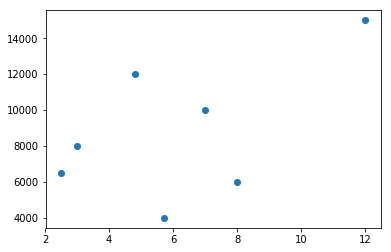

In [29]:
plt.scatter(B.exp,B.sal)

In [11]:
model1=smf.ols('sal~exp+g',B).fit()

In [12]:
 model1.params #now the slope is +ve

Intercept    3951.677273
exp           675.493474
g            1198.009923
dtype: float64

In [13]:
x1=B[['exp','g']]
y1=B[['sal']]
m2=LinearRegression()
m2.fit(x1,y1)
y2_predict=m2.predict(x1)
y2_predict

array([[ 5640.4109589 ],
       [ 7176.16761946],
       [ 7801.99007658],
       [ 8392.05587315],
       [ 9878.14151656],
       [12057.59896451],
       [10553.63499083]])

In [14]:
#values are same here, even tough the categories are changed from 0-1 and 1-0

In [15]:
############            lunch           ############

In [16]:
#introducing new col product of g and exp

In [17]:
new_col=x1['exp']*x1['g']
new_col
C=pd.concat([x1,new_col],axis=1)

In [18]:
C.columns=['exp','g','exp:g']

In [19]:
C #0-male,1-female

,exp,g,exp:g
0,2.5,0,0.0
1,3.0,1,3.0
2,5.7,0,0.0
3,4.8,1,4.8
4,7.0,1,7.0
5,12.0,0,0.0
6,8.0,1,8.0


In [20]:
x2=C[['exp','g','exp:g']]
y2=B[['sal']]
m3=LinearRegression()
m3.fit(x2,y2)
y3_predict=m3.predict(x2)
y3_predict

array([[ 4210.19403624],
       [10002.65251989],
       [ 7452.88200885],
       [ 9334.21750663],
       [ 8517.24137931],
       [13836.92395492],
       [ 8145.88859416]])

In [21]:
m3.intercept_ #beta0

array([1676.84405764])

In [22]:
m3.coef_

array([[ 1013.33999144,  9439.86681769, -1384.69277659]])

In [31]:
exp=0 #fresher female
g=1
ans=11116.7+1013.33999144*(exp)+9439.86681769*(g)-1384.69277659*(exp*g)
ans

20556.56681769

In [ ]:
exp=10 #10yr exp female
g=1
ans=11116.7-371.35278515*(exp)-9439.86681769*(g)+1384.69277659*(exp*g)
ans

In [ ]:
exp=10 #10yr exp male
g=0
ans=11116.7-371.35278515*(exp)-9439.86681769*(g)+1384.69277659*(exp*g)
ans

In [ ]:
exp=0 #fresher exp male
g=0
ans=11116.7-371.35278515*(exp)-9439.86681769*(g)+1384.69277659*(exp*g)
ans

In [ ]:
#after introducing interactive variable we can get lot of inferences

In [ ]:
def sal(exp,g):
    ans=11116.7-371.35278515*(exp)-9439.86681769*(g)+1384.69277659*(exp*g)
    return ans

In [ ]:
sal(10,0)

In [ ]:
rmse=